<a href="https://colab.research.google.com/github/geelmens/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 오픈소스 기반 데이터 분석 4강 - 데이터 수집


## 4-1 CSV 파일 읽기

In [ ]:
import pandas as pd

## data.csv 파일 읽기
df = pd.read_csv('data.csv', encoding= 'utf_8')
print(df)

           날짜    체중  골격근량  체지방량
0  2025.02.06  64.7  30.0  11.1
1  2025.02.04  64.0  29.3  11.6


## 4-2 JSON 파일 읽기



In [ ]:
import json
import pandas as pd

## data.json 파일 출력
with open('data.json', mode='r', encoding = 'utf-8') as f:
    data = json.load(f)

print(data)
## data.json 파일 DataFrame 읽기
df = pd.read_json('data.json', orient='records',encoding='utf_8',lines=False)
print(df)

{'매출데이터': [{'월': '2025-01', '매출액': 1000000, '비용': 700000, '이익': 300000}, {'월': '2025-02', '매출액': 1200000, '비용': 800000, '이익': 400000}, {'월': '2025-03', '매출액': 1500000, '비용': 900000, '이익': 600000}]}
                                               매출데이터
0  {'월': '2025-01', '매출액': 1000000, '비용': 700000,...
1  {'월': '2025-02', '매출액': 1200000, '비용': 800000,...
2  {'월': '2025-03', '매출액': 1500000, '비용': 900000,...


## 4-3 텍스트 파일 읽기 및 데이터 추출

In [ ]:
import re

## 파일(callcenter20250301.log) 오픈 및 읽기
with open('callcenter20250301.log', 'r', encoding='utf-8') as f:
    content = f.read()
## 주민등록번호 패턴 생성
pattern = re.compile(r'(\d{6})-(\d{7})')

## 주민등록번호 마스킹
masked_content = pattern.sub(r'\1-*******',content)

## 마스킹된 파일(callcenter20250301_masked.log) 오픈 및 쓰기
with open('callcenter20250301_masked.log', mode = 'w') as f:
    f.write(masked_content)

print("주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.")

주민등록번호 마스킹 완료. 'callcenter20250301_masked.log.txt' 파일로 저장되었습니다.


## 4-4 Open-Meteo의 무료 날씨 API를 통한 특정 지역 온도 조회

In [ ]:
import requests
import json

url = "https://api.open-meteo.com/v1/forecast?=&=&current=temperature_2m"
params = {
    "latitude": "37.58638333",
    "longitude": "127.0203333",
    "current": "temperature_2m"
}

try:
    ## URL 및 파라미터 전송
    response = requests.get(url,params=params)
    response.raise_for_status()

    ## JSON 데이터 읽기
    data = response.json()

    print("API 응답:", data)
    print("서울시 종로구의 현재 온도는 : {0}{1} 입니다.".format(data['current']['temperature_2m'], data['current_units']['temperature_2m']))

except requests.exceptions.RequestException as e:
    print(f"API 호출 실패: {e}")
except json.JSONDecodeError as e:
    print(f"JSON 파싱 실패: {e}")

API 응답: {'latitude': 37.6, 'longitude': 127.0, 'generationtime_ms': 0.030875205993652344, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 29.0, 'current_units': {'time': 'iso8601', 'interval': 'seconds', 'temperature_2m': '°C'}, 'current': {'time': '2025-10-15T11:45', 'interval': 900, 'temperature_2m': 17.8}}
서울시 종로구의 현재 온도는 : 17.8°C 입니다.


## 4-5 Selenium과 lxml을 이용한 웹 스크래핑

In [ ]:
!curl -o google-chrome-stable_current_amd64.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!apt install ./google-chrome-stable_current_amd64.deb -y
!pip install selenium webdriver_manager

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  114M  100  114M    0     0   180M      0 --:--:-- --:--:-- --:--:--  180M
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3 newly installed, 0 to remove and 38 not upgraded.
Need to get 10.9 MB/131 MB of archives.
After this operation, 448 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libvulkan1 amd64 1.3.204.1-2 [128 kB]
Get:2 /content/google-chrome-stable_current_amd64.deb google-chrome-stable amd64 141.0.7390.107-1 [121 MB]
Get:3 http://a

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from lxml import html
import time

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')               # 브라우저 창 없이 실행
chrome_options.add_argument('--no-sandbox')             # 보안모드 비활성화 (Colab 필수)
chrome_options.add_argument('--disable-dev-shm-usage')  # 메모리 부족 방지 (Colab 필수)
chrome_options.add_argument('--window-size=1920x1080')  # 창 크기 설정(가상)
chrome_options.add_argument('--disable-gpu')            # GPU 가속 비활성화 (일부 환경 안정성)
chrome_options.binary_location = "/usr/bin/google-chrome-stable"  # Colab용 크롬 경로 지정

## 드라이버 실행
driver = webdriver.Chrome(options=chrome_options)

## 사이트 접속
url = 'https://professor.knou.ac.kr/jaehwachung/index.do'
driver.get(url)

## 사이트 접속 대기
time.sleep(1)

## 페이지 제목 출력
page_source = driver.page_source
tree = html.fromstring(page_source)

title_text = tree.xpath('//title/text()')
print(title_text)

## 드라이버 종료
driver.quit()

['\n\t\tAlert \n\t\t\n\t']



# 실습 시나리오

## 공공데이터 포털 가입 및 데이터 신청

- [https://www.data.go.kr](https://www.data.go.kr)
- 한국환경공단 에어코리아 대기오염정보 데이터 신청

In [ ]:
import requests

## 데이터 수집 url 및 api key 설정


params = {
    'serviceKey': api_key,
    'returnType': 'json',
    'numOfRows': '100',
    'pageNo': '1',
    'sidoName': '서울',
    'ver': '1.0'
}

## 데이터 수집

## 호출 성공/실패 출력



# 오픈소스기반 데이터 분석 과제

In [8]:
#한국어 글꼴 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 1-2
Python을 사용하여 API를 호출하는 코드를 작성하고, 2015년 1월부터 2024년 12월까지의 개인 유형의 현년 전기, 가스, 수도, 지역난방 에너지 사용량 데이터를 수집

In [1]:
import requests
url = 'http://openapi.seoul.go.kr:8088/56587456746b79793331794548766d/json/energyUseDataSummaryInfo/1/7/'

def get_year_months():
  year_months = []
  for year in range(2015, 2024+1):
    for month in range(1,12+1):
      year_months.append(f'{year}{month:02d}')
  return year_months

responses = []

for year_month in get_year_months():
 url_full = url + year_month[0:4]+"/"+year_month[4:]
 response = requests.get(url_full)
 if response.status_code == 200:
  print(year_month + " api 호출 성공")   #호출 성공년월 print
  print(response.json())
 else:
  print(f"API 호출 실패: {response.status_code}")
 responses.append(response)

201501 api 호출 성공
{'energyUseDataSummaryInfo': {'list_total_count': 7, 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': [{'YEAR': '2015', 'MON': '01', 'MM_TYPE': '개인', 'CNT': '767791', 'EUS': '193784708', 'EUS1': '194781915', 'EUS2': '204969429', 'ECO2_1': '-6090964', 'ECO2_2': '-2582568.736', 'GUS': '59133720', 'GUS1': '57163993', 'GUS2': '68297619', 'GCO2_1': '-3597086', 'GCO2_2': '-8057472.64', 'WUS': '12819757.886', 'WUS1': '12723680.426', 'WUS2': '12899476.73', 'WCO2_1': '8179.308', 'WCO2_2': '2715.530256', 'HUS': '22740838.937', 'HUS1': '23400055.303', 'HUS2': '27090493.875', 'HCO2_1': '-2504435.652', 'HCO2_2': '-33660084.213069', 'REG_DATE': '2015-06-04 17:03:55.0'}, {'YEAR': '2015', 'MON': '01', 'MM_TYPE': '학교', 'CNT': '1382', 'EUS': '134955565', 'EUS1': '128707423', 'EUS2': '145561511', 'ECO2_1': '-2178902', 'ECO2_2': '-923854.448', 'GUS': '9107197', 'GUS1': '8410968', 'GUS2': '10745416', 'GCO2_1': '-470995', 'GCO2_2': '-1055028.8', 'WUS': '2075819.2', 'WUS1': '2

##2-1
수집한 JSON 형태의 데이터를 pandas DataFrame으로 변환하고, 데이터의 기본 정보를 출력

In [15]:
import pandas as pd

df_list = []

for response in responses:
    data = response.json()['energyUseDataSummaryInfo']['row']
    df = pd.DataFrame(data)
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)
df_keep = df_all[df_all['MM_TYPE']=='개인'][['YEAR','MON','MM_TYPE','CNT','EUS','GUS','WUS','HUS']]
#print(df_keep.dtypes)

df_fin = df_keep.apply(pd.to_numeric, errors='ignore')
#print(df_fin.dtypes)
print(df_fin.info())
print(df_fin.describe())
df_fin.head()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 835
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     120 non-null    int64  
 1   MON      120 non-null    int64  
 2   MM_TYPE  120 non-null    object 
 3   CNT      120 non-null    int64  
 4   EUS      120 non-null    int64  
 5   GUS      120 non-null    float64
 6   WUS      120 non-null    float64
 7   HUS      120 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 8.4+ KB
None
              YEAR         MON           CNT           EUS           GUS  \
count   120.000000  120.000000  1.200000e+02  1.200000e+02  1.200000e+02   
mean   2019.500000    6.500000  1.060392e+06  2.527874e+08  3.432519e+07   
std       2.884324    3.466527  1.321069e+05  5.288247e+07  2.565226e+07   
min    2015.000000    1.000000  7.677910e+05  1.348281e+08  5.729131e+06   
25%    2017.000000    3.750000  9.691695e+05  2.187215e+08  1.070171e+07  

/tmp/ipython-input-4203762871.py:14: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_fin = df_keep.apply(pd.to_numeric, errors='ignore')


,YEAR,MON,MM_TYPE,CNT,EUS,GUS,WUS,HUS
0,2015,1,개인,767791,193784708,59133720.0,1.281976e+07,2.274084e+07
7,2015,2,개인,774620,189974230,56487358.0,1.265689e+07,1.879332e+07
19,2015,3,개인,783726,175215719,49984873.0,1.265547e+07,1.382635e+07
27,2015,4,개인,798971,183891769,37306841.0,1.295477e+07,5.836003e+06
28,2015,5,개인,810422,177289769,22060892.0,1.308673e+07,1.320896e+06


## 2.2
연도별, 계절별 분석을 위해 날짜 컬럼을 활용하여 연도(year)와 계절(season) 컬럼을 추가하는 전처리 코드

In [3]:
def season(month):
    if month in [12,1,2]:
        return '겨울'
    elif month in [3,4,5]:
        return '봄'
    elif month in [6,7,8]:
        return '여름'
    elif month in [9,10,11]:
        return '가을'
df_fin['season'] = df_fin['MON'].apply(season)
df_fin.head(12)

,YEAR,MON,MM_TYPE,CNT,EUS,GUS,WUS,HUS,season
0,2015,1,개인,767791,193784708,59133720.0,1.281976e+07,2.274084e+07,겨울
7,2015,2,개인,774620,189974230,56487358.0,1.265689e+07,1.879332e+07,겨울
19,2015,3,개인,783726,175215719,49984873.0,1.265547e+07,1.382635e+07,봄
27,2015,4,개인,798971,183891769,37306841.0,1.295477e+07,5.836003e+06,봄
28,2015,5,개인,810422,177289769,22060892.0,1.308673e+07,1.320896e+06,봄
37,2015,6,개인,813731,186073153,12677645.0,1.424165e+07,2.943126e+05,여름
46,2015,7,개인,823337,165114568,8893640.0,1.208388e+07,7.028636e+05,여름
49,2015,8,개인,831008,242000479,7619018.0,1.516455e+07,4.602890e+05,여름
62,2015,9,개인,836705,207540868,6518422.0,1.441908e+07,3.057107e+05,가을
63,2015,10,개인,838855,186473958,8924018.0,1.471183e+07,3.167520e+06,가을


##3.1
연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화량을 선 그래프로 시각화

Text(0, 0.5, '에너지 사용 총 사용량')

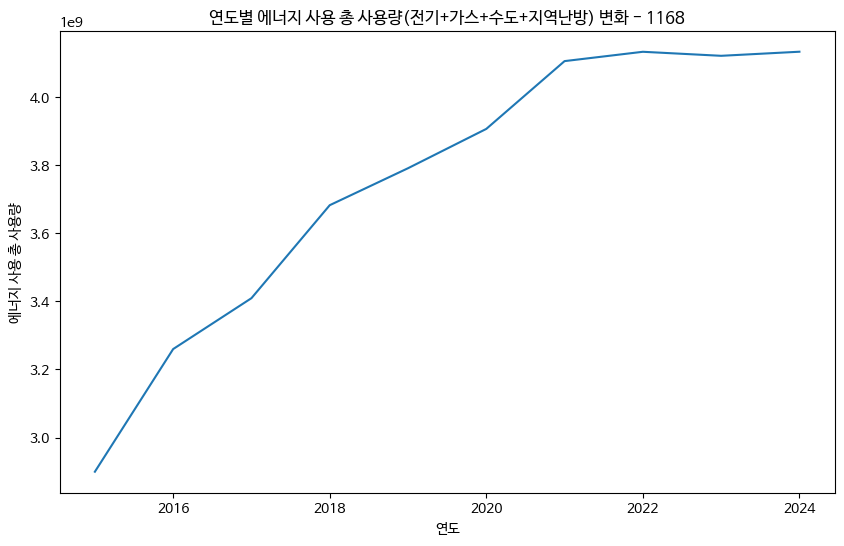

In [38]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

#총 사용량 변수 생성
df_fin['TUS'] = df_fin[['EUS','GUS','WUS','HUS']].sum(axis=1)

#연도별로 SUM
annual_tus = df_fin.groupby('YEAR')['TUS'].sum().reset_index()

#시각화
plt.figure(figsize=(10,6))
plt.plot(annual_tus['YEAR'], annual_tus['TUS'])
plt.title('연도별 에너지 사용 총 사용량(전기+가스+수도+지역난방) 변화 - 1168')
plt.xlabel('연도')
plt.ylabel('에너지 사용 총 사용량')

##3.2
계절별 가스 사용량 평균을 막대 그래프로 시각화하고, 각 막대에 구체적인 수치를 표시

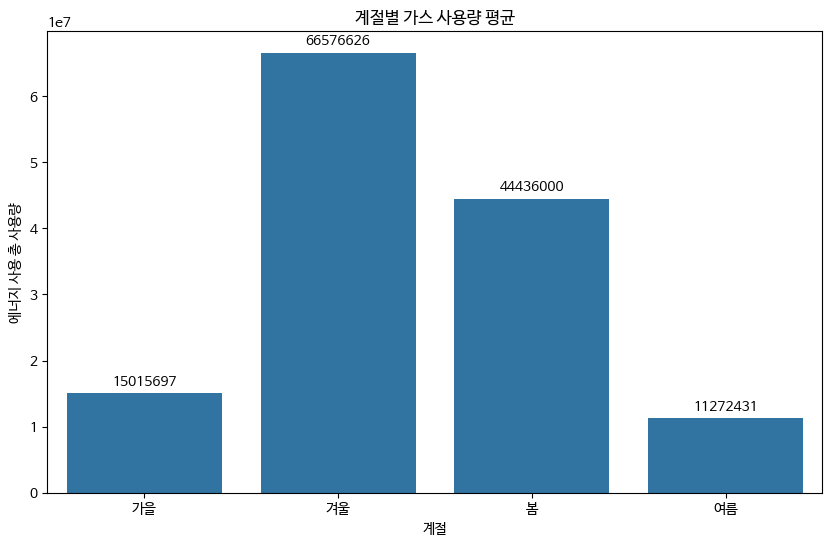

In [6]:
import seaborn as sns

#계절별로 평균
seasonal_gus = df_fin.groupby('season')['GUS'].mean().reset_index()

#시각화
plt.figure(figsize=(10,6))
ax = sns.barplot(data=seasonal_gus, x='season', y='GUS')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.title('계절별 가스 사용량 평균')
plt.xlabel('계절')
plt.ylabel('에너지 사용 총 사용량')
plt.show()

##4.
연도별 에너지 사용량 변화에서 나타나는 주요 트렌드를 찾아 분석하고, 그 원인을 추론하여 200자 이내로 설명하시오

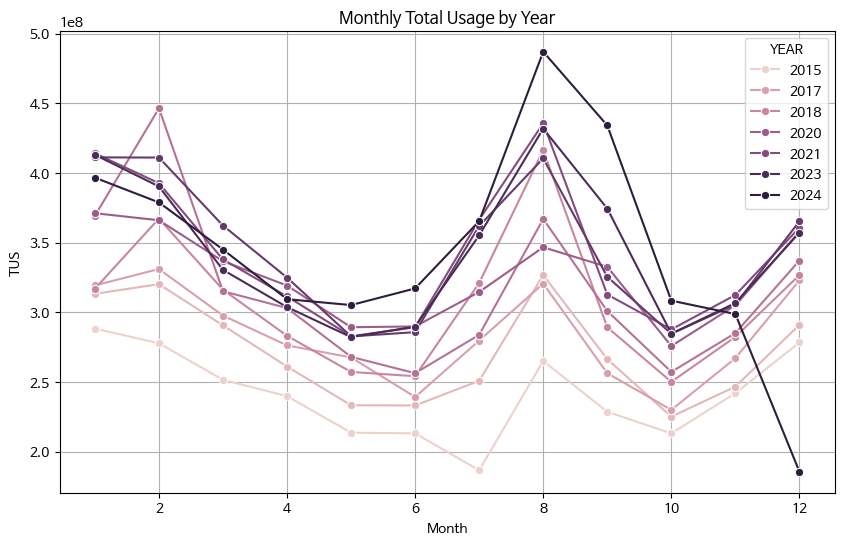

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_fin, x='MON', y='TUS', hue='YEAR', marker='o')
plt.title('Monthly Total Usage by Year')
plt.xlabel('Month')
plt.ylabel('TUS')
plt.grid(True)
plt.show()

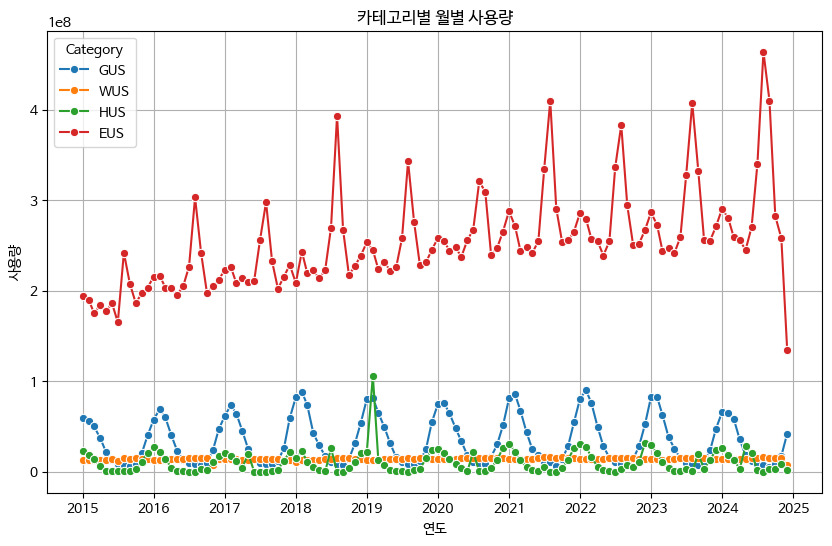

In [17]:
date_parts = df_fin[['YEAR', 'MON']].copy()
date_parts.columns = ['year', 'month']  # Rename 'MON' to 'month'
date_parts['day'] = 1  # Add a default day
df_fin['date'] = pd.to_datetime(date_parts)

df_melted = df_fin.melt(id_vars='date', value_vars=['GUS', 'WUS', 'HUS', 'EUS'],
                    var_name='Category', value_name='Usage')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='date', y='Usage', hue='Category', marker='o')
plt.title('카테고리별 월별 사용량')
plt.xlabel('연도')
plt.ylabel('사용량')
plt.grid(True)
plt.show()

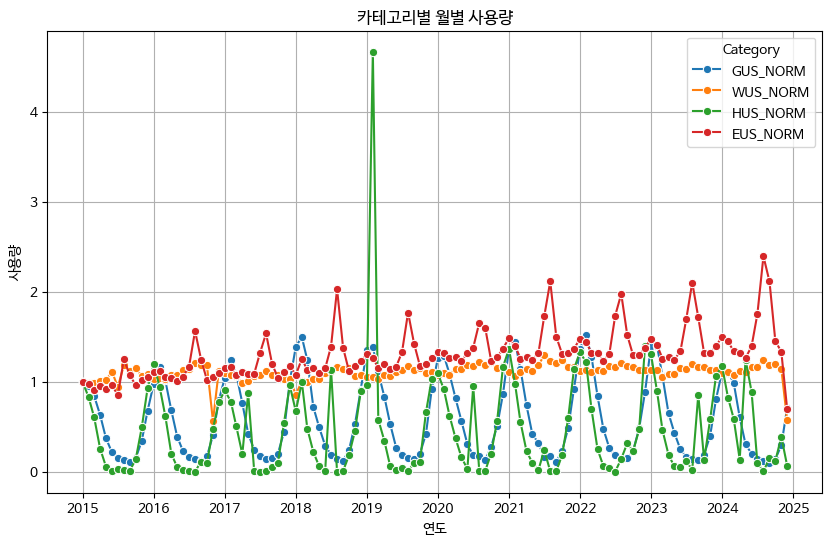

In [26]:
df_fin['GUS_NORM'] = df_fin['GUS']/df_fin['GUS'].iloc[0]
df_fin['EUS_NORM'] = df_fin['EUS']/df_fin['EUS'].iloc[0]
df_fin['WUS_NORM'] = df_fin['WUS']/df_fin['WUS'].iloc[0]
df_fin['HUS_NORM'] = df_fin['HUS']/df_fin['HUS'].iloc[0]

df_melted2 = df_fin.melt(id_vars='date', value_vars=['GUS_NORM', 'WUS_NORM', 'HUS_NORM', 'EUS_NORM'],
                    var_name='Category', value_name='Usage')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted2, x='date', y='Usage', hue='Category', marker='o')
plt.title('카테고리별 월별 사용량')
plt.xlabel('연도')
plt.ylabel('사용량')
plt.grid(True)
plt.show()

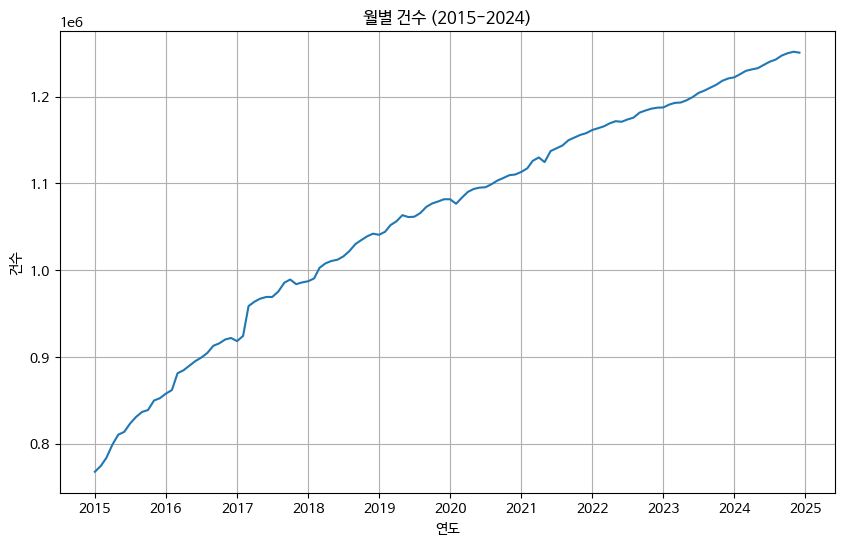

In [41]:
plt.figure(figsize=(10,6))
plt.plot(df_fin['date'],df_fin['CNT'])
plt.title('월별 건수 (2015-2024)')
plt.xlabel('연도')
plt.ylabel('건수')
plt.grid(True)
plt.show()

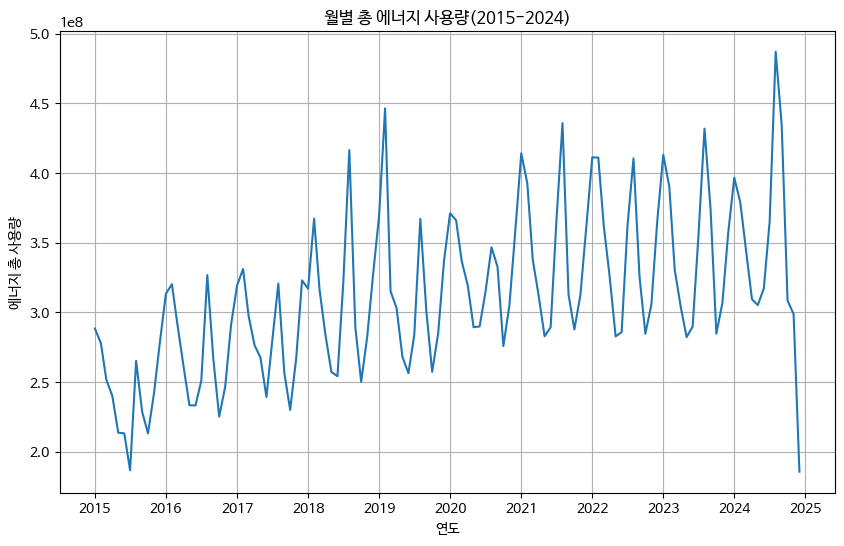

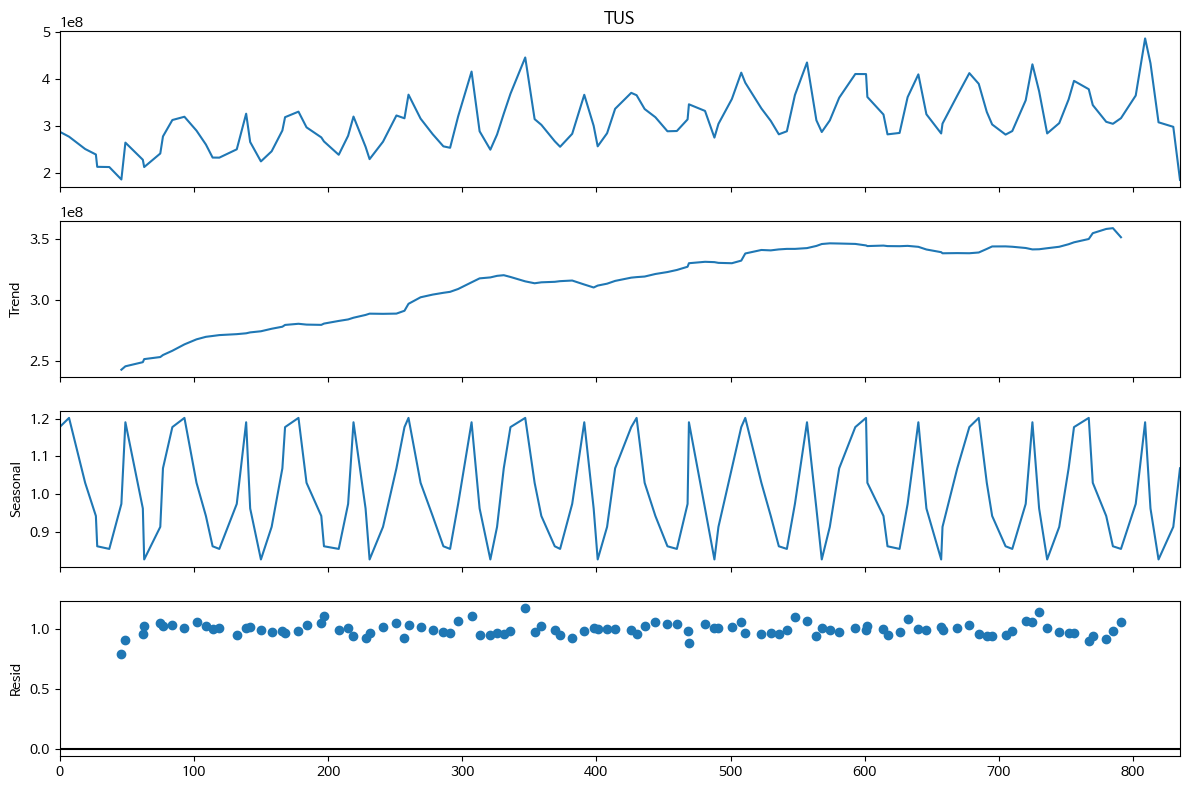

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(10,6))
plt.plot(df_fin['date'],df_fin['TUS'])
plt.title('월별 총 에너지 사용량(2015-2024)')
plt.xlabel('연도')
plt.ylabel('에너지 총 사용량')
plt.grid(True)
plt.show()

decomposition = seasonal_decompose(
    df_fin['TUS'],
    model = 'multiplicative',
    period = 12
)

fig = decomposition.plot()
fig.set_size_inches(12,8)
plt.tight_layout()
plt.show()